<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — ответить на следующие вопросы:
1. Какие факторы больше всего влияют на стоимость квартиры? 
2. В каких населенных пунктах самая высокая и самая низкая стоимость квадратного метра недвижимости?
3. Как зависит стоимость квартры в Санкт-Петербурге от ее удаленности от центра города?
4. Какие факторы больше всего влияют на стоимость квартры в центре Санкт-Петербурга?

**Ход исследования** Данные о рынке недвижимости в ЛО мы получим из файла data.csv. О качестве данных ничего не известно. Поэтому перед ответами на вопросы понадобится обзор данных.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
print(df.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

In [4]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
display(df.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Описание данных
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

Предварительно можно утверждать, что, данных достаточно для ответа на поставленные вопросы. Но встречаются пропуски в данных, а в некоторых столбцах встречаются аномальные значения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

**Обработка пропусков**

In [8]:
#Пропущенные значения в столбце высота потолков заменим на медианные значения
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())
#Пропущенные значения в столбце число этажей заменим на средние значения
df['floors_total']=df['floors_total'].fillna(df['floors_total'].mean())
#Пропущенные значения в столбце число дней до снятии с публикации изменим на нули, так как выбор
#среднего или медианного значения будет сильно влиять на результат поставленной задачи
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].fillna(0))
#Пропущенные значения в столбце жилой площади на средние значения
df['living_area']=df['living_area'].fillna(df['living_area'].mean())

In [9]:
print(sorted(df['is_apartment'].unique()))

[nan, False, True]


In [10]:
df['is_apartment']=df['is_apartment'].fillna('unknown')
df['kitchen_area']=df['kitchen_area'].fillna(df['kitchen_area'].median())
df['balcony']=df['balcony'].fillna(0)
#Есть пропуске в столбце с названием города, такие строки я решил удалить. Их всего 49, на результат не повлияет
df.dropna(subset = ['locality_name'], inplace = True)
df['airports_nearest']=df['airports_nearest'].fillna(df['airports_nearest'].median())
#Пропущенные значения в столбце расстояние до центра изименю на максимальное значения для типа переменной int8=127 * 1000
#Поясню: у меня будет стобец с расстоянием в км - его тип int8
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(127000)
#Изменим неизвестные расстояния дл парков и прудов на нули, чтобы при необходимости их легко можно было откинуть
#при решении задачи
df['parks_nearest']=df['parks_nearest'].fillna(0)
df['parks_around3000']=df['parks_around3000'].fillna(0)
df['ponds_nearest']=df['ponds_nearest'].fillna(0)
df['ponds_around3000']=df['ponds_around3000'].fillna(0)


In [11]:
# изменим типы данных и оптимизируем наш датафрейм
df['total_images']=df['total_images'].astype('int8') 
df['last_price']=df['last_price'].astype('int32') 
df['days_exposition']=df['days_exposition'].astype('int32')
df['total_area']=df['total_area'].astype('int16')
df['rooms']=df['rooms'].astype('int16')
df['ceiling_height']=df['ceiling_height'].astype('float16')
df['floors_total']=df['floors_total'].astype('int8')
df['living_area']=df['living_area'].astype('float32') 
df['floor']=df['floor'].astype('int8')
df['kitchen_area']=df['kitchen_area'].astype('int8')
df['balcony']=df['balcony'].astype('int8')
df['airports_nearest']=df['airports_nearest'].astype('int32') 
df['cityCenters_nearest']=df['cityCenters_nearest'].astype('int32') 
df['airports_nearest']=df['airports_nearest'].astype('int32') 
df['parks_around3000']=df['parks_around3000'].astype('int16') 
df['parks_nearest']=df['parks_nearest'].astype('int16') 
df['ponds_around3000']=df['ponds_around3000'].astype('int16') 
df['ponds_nearest']=df['ponds_nearest'].astype('int16') 

df['locality_name']=df['locality_name'].astype('category')

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int8
last_price              23650 non-null int32
total_area              23650 non-null int16
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int16
ceiling_height          23650 non-null float16
floors_total            23650 non-null int8
living_area             23650 non-null float32
floor                   23650 non-null int8
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int8
balcony                 23650 non-null int8
locality_name           23650 non-null category
airports_nearest        23650 non-null int32
cityCenters_nearest     23650 non-null int32
parks_around3000        23650 non-null int16
parks_nearest           23650 non-null int16
ponds_around3000        23

Проверим столбец locality_name на наличие дубликатов

In [14]:
print(df['locality_name'].unique())

[Санкт-Петербург, посёлок Шушары, городской посёлок Янино-1, посёлок Парголово, посёлок Мурино, ..., деревня Нижняя, коттеджный посёлок Лесное, деревня Тихковицы, деревня Борисова Грива, посёлок Дзержинского]
Length: 364
Categories (364, object): [Санкт-Петербург, посёлок Шушары, городской посёлок Янино-1, посёлок Парголово, ..., коттеджный посёлок Лесное, деревня Тихковицы, деревня Борисова Грива, посёлок Дзержинского]


In [15]:
df['locality_name']=df['locality_name'].str.lower()
print(df['locality_name'].nunique())

364


In [16]:
wordlist = ['посёлок','поселок','городской','городского','типа','деревня']

def remove_type(x):
    '''Функция возвращает строку, удаляя из нее все слова, встречающиеся в проверочном списке'''
    a = x.split()
    temp = a[:]
    for word in temp: 
        if word in wordlist: 
            a.remove(word)
    return " ".join(a)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].map(lambda x: remove_type(x))

In [17]:
print(df['locality_name'].unique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'садовое товарищество новая ропша' 'павловск' 'пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'
 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное село' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет'
 'сланцы' 'село путилово' 'ивангород' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры'
 'рощино' 'кириши' 'луга' 'волосово' 'отрадное' 'село павлово' 'оредеж'
 'село копорье' 'молодёжное' 'тихвин' 'победа' 'нурма' 'синявино' 'тосно'
 'стрельна' 'бокситогорск' 'александровская' 'лопухинка' 'пикалёво'
 'терволово' 'советский' 'подпорожье' 'петровское' 'токсово' 'сельцо'
 'вырица' 'кипен

In [18]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.699219,16,51.000000,8,unknown,...,25,0,санкт-петербург,18863,16028,1,482,2,755,0
1,7,3350000,40,2018-12-04,1,2.650391,11,18.600000,1,unknown,...,11,2,шушары,12817,18603,0,0,0,0,81
2,10,5196000,56,2015-08-20,2,2.650391,5,34.299999,4,unknown,...,8,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24,3,2.650391,14,34.457851,9,unknown,...,9,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3.029297,14,32.000000,13,unknown,...,41,0,санкт-петербург,31856,8098,2,112,1,48,121


### Вывод

Размер нашего датафрейма составил 2.8 мб вместо исходных 8.1. Все пропуски обработаны. Можно приступить к следующему этапу.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [19]:
#Цена квадратного метра
df['square_price']=df['last_price']/df['total_area']

In [20]:
#Номер дня недели первого размещения объявления
df['weekday'] = df['first_day_exposition'].dt.weekday

In [21]:
def weekday(x):
    '''Функция возвращает название дня недели'''
    if x==0:
        x= 'Понедельник'
        return x
    elif x==1:
        x='Вторник'
        return x
    elif x==2:
        x= 'Среда'
        return x
    elif x==3:
        x= 'Четверг'
        return x
    elif x==4:
        x= 'Пятница'
        return x
    elif x==5:
        x= 'Суббота'
        return x
    else:
        x= 'Воскресенье'
        return x 

In [22]:
#Изменим номера дней недели на их названия и изменим тип стобца
df.loc[:,'weekday'] = df.loc[:,'weekday'].map(lambda x: weekday(x))
df['weekday']=df['weekday'].astype('category')

In [23]:
#Добавим столбцы с месяцем и годом объявления, и изменим тип
df['weekday_num'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['month']=df['month'].astype('int8')
df['year']=df['year'].astype('int16')

In [24]:
def category_floor(floor,floors_total):
    '''Функция возвращает категорию этажа'''
    if floor == floors_total:
        return 'Последний'
    if floor == 1:
        return 'Первый'
    else:
        return 'Другой'

In [25]:
#Добавим столбец с категорией этажа
df['category_floor'] = df.apply(lambda x: category_floor(x.floor, x.floors_total), axis=1)

In [26]:
#Соотношение жилой и общей площади
df['ratio_living'] = df['living_area'] / df['total_area']
#Отношение площади кухни к общей
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

In [27]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_price,weekday,weekday_num,month,year,category_floor,ratio_living,ratio_kitchen
0,20,13000000,108,2019-03-07,3,2.699219,16,51.000000,8,unknown,...,755,0,120370.370370,Четверг,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.650391,11,18.600000,1,unknown,...,0,81,83750.000000,Вторник,1,12,2018,Первый,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.650391,5,34.299999,4,unknown,...,574,558,92785.714286,Четверг,3,8,2015,Другой,0.612500,0.142857
3,0,64900000,159,2015-07-24,3,2.650391,14,34.457851,9,unknown,...,234,424,408176.100629,Пятница,4,7,2015,Другой,0.216716,0.056604
4,2,10000000,100,2018-06-19,2,3.029297,14,32.000000,13,unknown,...,48,121,100000.000000,Вторник,1,6,2018,Другой,0.320000,0.410000


### Вывод

Мы добавили к датафрейму недостающие данные, необходимые для решения поставленных задач.

## Исследовательский анализ данных

**4.1** Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

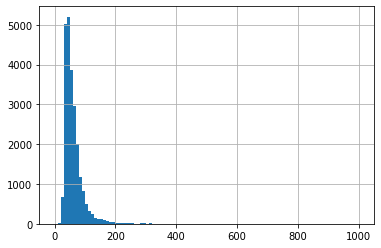

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [28]:
#изучим общую площадь
df['total_area'].hist(bins=100, range=(0,1000))
plt.show()
df['total_area'].describe()

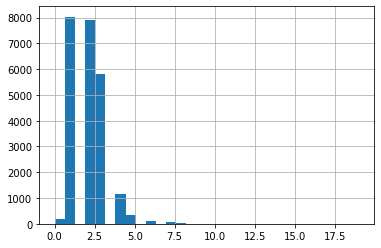

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [29]:
#изучим количество комнат
df['rooms'].hist(bins=30)
plt.show()
df['rooms'].describe()

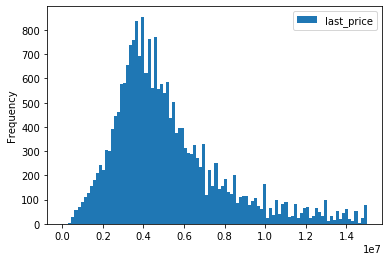

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [30]:
#изучим цену
df.plot(y = 'last_price', kind = 'hist', bins = 100, range = (0,15000000))
plt.show()
df['last_price'].describe()

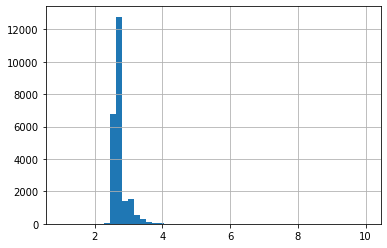

count    23650.000000
mean         2.724609
std          0.989258
min          1.000000
25%          2.599609
50%          2.650391
75%          2.699219
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
#изучим высоту потолков
df['ceiling_height'].hist(bins=50, range=(1,10))
plt.show()
df['ceiling_height'].describe()

### Вывод

1. Общая плозадь недвижимость варьируется от 12 до 900 кв.м. Общее распределение имеет нормальный вид. Среднее значение - 60.1 кв.м
2. В среднем квартиры имеют две комнаты, однако встречается вариант квартиры с 19 комнатами.
3. Распределение цены имеет вид распределения Гаусса, видны аномалии - напирмер минимальная стоимость квартиры 12 тыс. руб. Среднияя стоимость - 6.5 млн. руб, медианная - 4.65 млн. руб.
4. У исходных данных явно присутствуют аномальные значения, например высота потолка меньше метра и 100 метров. В среднем же, высота потолков составила 2.7 м.

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

Изучем время продажи квартиры и посмотрим на гистограмму

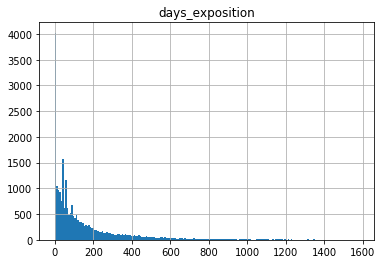

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
df.hist('days_exposition',bins=200)
plt.show()
df['days_exposition'].describe()

Много нулевых значений - мы заменили неизвестные значения нулями на этапе предобработки. Исключим их с гистрограммы. Также можно сказать, что продажа длится не более 800 дней, после этой отметки линия практически сливается с нулем, и эти значения не оказывают влияние на общую картину

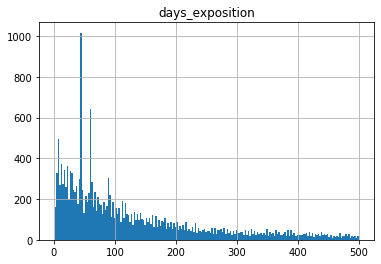

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
df.hist('days_exposition',bins=200, range=(1,500))
plt.show()
df[df['days_exposition']!=0]['days_exposition'].describe()

Среднее значение - 180 дней, медианное 95. Похоже на правду. На гистограмме видны всплески данных в дни 7, 30, 45, 60, 75 и 90. Возможно они связаны с автоматическим удалением объявления. Предлагаю их также исключить и посмотреть на общую картину.

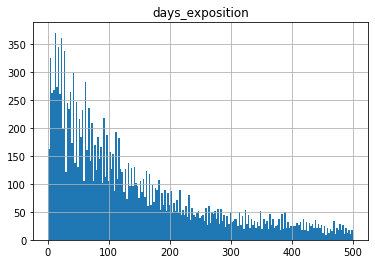

count    21520.00000
mean       167.14382
std        220.92990
min          0.00000
25%         20.00000
50%         87.00000
75%        218.00000
max       1580.00000
Name: days_exposition, dtype: float64

In [34]:
good_df=df.query('days_exposition!=7 and days_exposition!=30 and days_exposition!=45 and days_exposition!=60 and days_exposition!=75 and days_exposition!=90')
good_df.hist('days_exposition',bins=200, range=(1,500))
plt.show()
plt.show()
good_df['days_exposition'].describe()

In [35]:
#Проверим какой процент данных пришлось отбросить 
df[df['days_exposition']!=0]['days_exposition'].describe()[0]/good_df['days_exposition'].describe()[0]

0.9512081784386617

Судя по полученным данным - среднее время продажи составило 167 дней, а медианное 87 дней. Межквартильный размах составил от 20 до 218 дней, однако на общей гистограмме видим, что срок продажи может достигать и 600 дней. 

**Изучим зависимость цены квадратного метра от общей площади квартиры**

                   median           mean
total_area                              
12          200000.000000  200000.000000
13          136000.000000  168000.000000
14           85000.000000   85000.000000
15          126666.666667  131111.111111
16          131250.000000  131250.000000
...                   ...            ...
517          96711.798839   96711.798839
590         110169.491525  110169.491525
618         485436.893204  485436.893204
631         221870.047544  221870.047544
900         466666.666667  466666.666667

[310 rows x 2 columns]


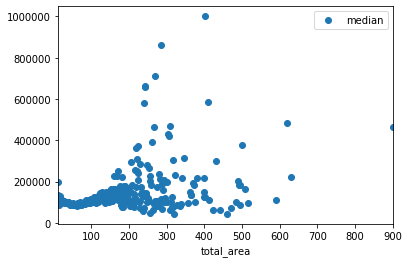

0.29891959856589523

In [36]:
price_square=df.pivot_table(index='total_area', values='square_price',aggfunc=['median','mean'])
price_square.columns=['median','mean']
print(price_square)
price_square.plot(y='median', style='o')
plt.show()
df['total_area'].corr(df['square_price'])

Судя по графику - зависимости почти нет. Коэффициент Пирсона всего 0.29

**Изучим зависимость цены квадратного метра от числа комнат**

              median           mean  count
rooms                                     
0      106666.666667  109346.905297    197
1      100559.152778  101491.311293   8036
2       93181.818182   95894.373883   7924
3       89356.435644   97469.607176   5797
4       92800.000000  110531.838285   1175
5       96727.189503  126885.778183    326
6       99750.000000  140845.964893    105
7      108958.837772  163648.023195     59
8      106836.695485  184704.826070     12
9       92678.714859  105093.699008      8
10      84558.823529   98083.039090      3
11     132865.754042  132865.754042      2
12     466666.666667  466666.666667      1
14      92923.016810   92923.016810      2
15     110169.491525  110169.491525      1
16     105555.555556  105555.555556      1
19      86229.946524   86229.946524      1


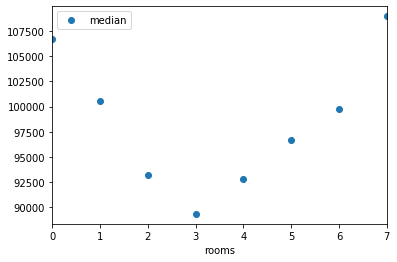

0.0522448045363964

In [37]:
price_rooms=df.pivot_table(index='rooms', values='square_price',aggfunc=['median','mean', 'count'])
price_rooms.columns=['median','mean', 'count']
print(price_rooms)
price_rooms.query('count>20').plot(y='median', style='o')
plt.show()
df['rooms'].corr(df['square_price'])

Коэфициент Пирсона всего 0.05 - зависимости нет. Однако по графику видно, что наименьшей стоимостью квадратного метра обладают трехкомнатные варианты

**Изучим зависимость цены квадратного метра от этажа**

In [38]:
floor_price=df.query('category_floor != "Другой"').pivot_table(index='category_floor', values='square_price', aggfunc=['median','mean', 'count'])
floor_price.columns=['median','mean', 'count']
print(floor_price)

                      median          mean  count
category_floor                                   
Первый          81707.317073  82682.090449   2887
Последний       88193.473193  93428.533180   3358


Разница между средней стоимостью вариантов на первом и последнем этаже составила 12%. Мы не можем говорить о наличии какой либо связи между ними.

**Зависимость цены квадратного метра от удалённости от центра**

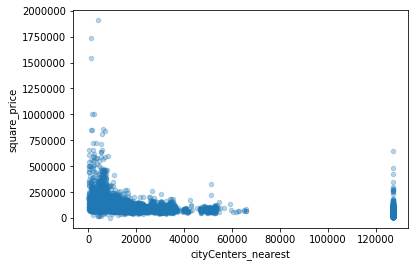

-0.4432972289206165

In [39]:
df.plot(kind = 'scatter', y = 'square_price', x = 'cityCenters_nearest', alpha = 0.3)
plt.show()
df['cityCenters_nearest'].corr(df['square_price'])

Ожидаемо, чем ближе кваритра к центру, тем выше ее стоимость. Коэфициент Пирсона -0.44. 

**Зависимость цены квадратного метра от даты размещения: дня недели**

                   median           mean  count
weekday_num                                    
0            95257.402718   99919.579739   3606
1            96103.896104  100179.732002   4175
2            96052.631579  100064.194508   3966
3            95555.555556  100653.824198   4286
4            95000.000000   99438.202671   3992
5            94117.647059   99511.710235   1933
6            95000.000000   98196.528365   1692


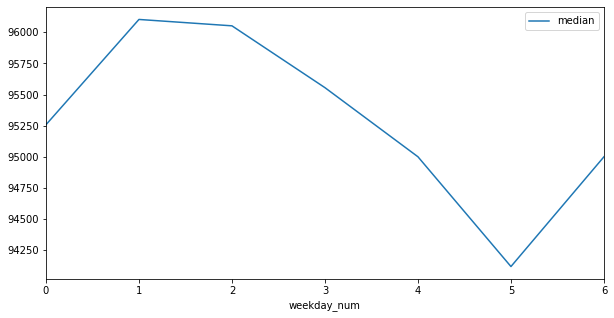

In [40]:
price_weekday=df.pivot_table(index='weekday_num', values='square_price',aggfunc=['median','mean', 'count'])
price_weekday.columns=['median','mean', 'count']
print(price_weekday)
price_weekday.plot(y='median', figsize=(10,5))
plt.show()

По графику видно, что наименьшая цена квадратного метра - в субботу. Наиболее "дорогие" дни - вторник и среда. Возможно, это связано с тем, что люди ищут варианты именно посреди рабочей недели, чтобы в выходные их осматривать

**Зависимость цены квадратного метра от даты размещения: месяц**

             median           mean  count
month                                    
1      95961.538462  100296.602713   1491
2      95454.545455   99197.662541   2639
3      95588.235294   99490.158435   2582
4      97014.925373  102417.158466   2373
5      93333.333333   98953.681617   1270
6      93333.333333   98211.529032   1755
7      95640.294607  100111.473727   1690
8      96708.333333  100603.530043   1742
9      96333.333333  100935.431383   1979
10     94609.564165   98449.299609   2124
11     96153.846154   99708.241198   2367
12     94654.761905   99936.373185   1638


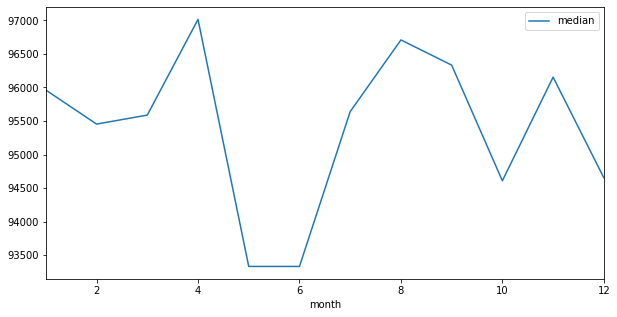

In [41]:
price_month=df.pivot_table(index='month', values='square_price',aggfunc=['median','mean', 'count'])
price_month.columns=['median','mean', 'count']
print(price_month)
price_month.plot(y='median', figsize=(10,5))
plt.show()

Наибольший провал цен наблюдается в мае и июне, что совпадает с сезонностью рынка недвижимости - наибольшие цены в начале весны, в начале осени, и в начале зимы. 

**Зависимость цены квадратного метра от даты размещения: год**

             median           mean  count
year                                     
2014  107493.989547  124781.676854    136
2015   93548.387097  105081.039949   1173
2016   92200.000000   98647.145737   2765
2017   93181.818182   98041.536444   8185
2018   96363.636364   98306.632272   8512
2019  104081.632653  107687.906548   2879


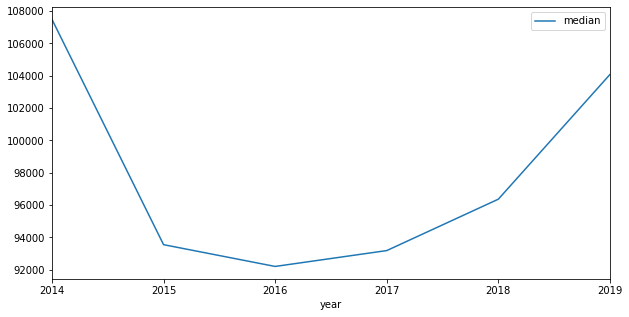

In [42]:
price_year=df.pivot_table(index='year', values='square_price',aggfunc=['median','mean', 'count'])
price_year.columns=['median','mean', 'count']
print(price_year)
price_year.plot(y='median', figsize=(10,5))
plt.show()

На графике отчетливо видны последствия кризиса 2014 года. Обвал рубля на фондовом рынке, вкупе с рекордным повышением ключевой ставки ЦБ сильно увиличило стоимость ипотеки и снизило спрос на недвижимость. К 2017 году ставка начала постепенно сокращаться, нормализуя рынок недвижимости. 

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.**

In [43]:
locality = df.pivot_table(index = 'locality_name', values = 'square_price', aggfunc=['count', 'mean'])
locality.columns = ['count', 'mean']
display(locality.sort_values('count', ascending = False).head(10))


,count,mean
locality_name,,
санкт-петербург,15721,115347.722976
мурино,590,86729.540028
кудрово,472,95879.316021
шушары,440,79068.602928
всеволожск,398,68985.235455
пушкин,369,103611.362825
колпино,338,75735.589833
парголово,327,90675.627757
гатчина,307,69045.519030


Таблица говорит сама за себя: наибольшая стоимость квадратного метра в Санкт-Петербурге, а нименьшая в Выборге. 

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

                         square_price
cityCenters_nearest_km               
0                       187717.073514
1                       166970.877411
2                       147017.069402
3                       129829.583182
4                       137912.334714
5                       147436.072727
6                       152775.279195
7                       141884.681831
8                       121101.882748
9                       110497.146935
10                      112171.114740
11                      107349.656138
12                      108825.705712
13                      107697.029042
14                      105504.588388
15                      102372.413434
16                      100618.756264
17                       94579.736517
18                       95336.039680
19                       96169.283529
20                      107623.875614
21                       91947.536576
22                       89035.759495
23                       93252.244018
24          

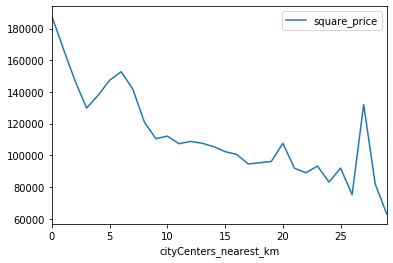

In [44]:
df['cityCenters_nearest_km']=df['cityCenters_nearest']/1000
df['cityCenters_nearest_km']=df['cityCenters_nearest_km'].astype('int8')
saint_pete_price=df.query('locality_name == "санкт-петербург" and cityCenters_nearest_km !=127').pivot_table(index='cityCenters_nearest_km', values='square_price', aggfunc='mean')
print(saint_pete_price)
saint_pete_price.plot()
plt.show()

Судя по графику центром города можем считать радиус в 9км. 

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [45]:
#выделим новый датафрейм с вариантами в Питере, а радиус удаленности от центра не более 9 км
saint_pete_center=df.query('locality_name == "санкт-петербург" and cityCenters_nearest_km < 9')

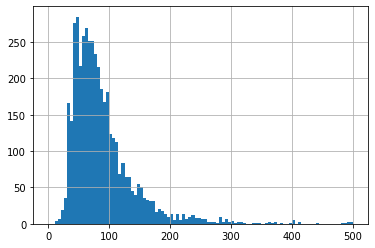

count    4382.000000
mean       88.348699
std        57.947649
min        12.000000
25%        53.000000
50%        75.000000
75%       104.000000
max       900.000000
Name: total_area, dtype: float64

In [46]:
saint_pete_center['total_area'].hist(bins=100, range=(0,500))
plt.show()
saint_pete_center['total_area'].describe()

Видим нормальное распределение, средня площадь 88 кв.м, а медианная 75 кв.м. (против 60 и 52 соответственно по всей ЛО)

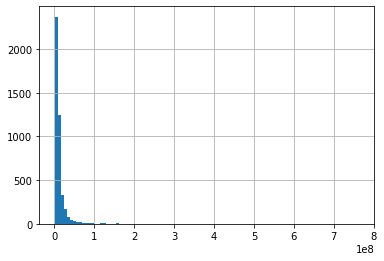

count    4.382000e+03
mean     1.376875e+07
std      2.296136e+07
min      1.600000e+06
25%      6.207104e+06
50%      8.707500e+06
75%      1.350000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [47]:
saint_pete_center['last_price'].hist(bins=100)
plt.show()
saint_pete_center['last_price'].describe()

Средняя стоимость квартиры в центре Питера - 13.7 млн.руб, медианная - 8.7 млн. руб. (против 6.5 и 4.65 соотвественно в ЛО)

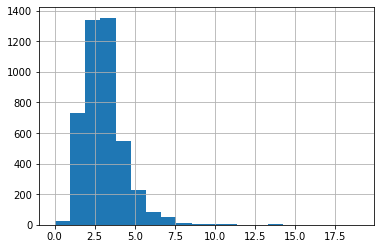

count    4382.000000
mean        2.720904
std         1.410307
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [48]:
saint_pete_center['rooms'].hist(bins=20)
plt.show()
saint_pete_center['rooms'].describe()

Среднее и медианное количество комнат - 3

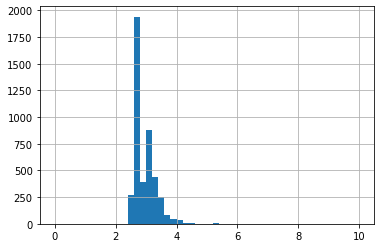

count    4382.000000
mean        2.951172
std         1.677734
min         2.000000
25%         2.650391
50%         2.754883
75%         3.099609
max       100.000000
Name: ceiling_height, dtype: float64

In [49]:
saint_pete_center['ceiling_height'].hist(bins=50, range=(0,10))
plt.show()
saint_pete_center['ceiling_height'].describe()

Очевидно, в центре Питера больше квартир с высокими потолками - среднее значение 2.95м. 

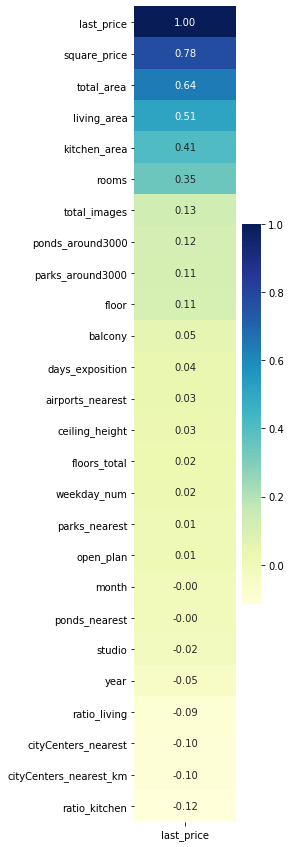

In [50]:
plt.figure(figsize=(5,15))
plt.subplot(1, 2, 1)
(sns.heatmap(saint_pete_center
             .corr()[['last_price']]
             .sort_values(by='last_price', ascending=False), cmap="YlGnBu", annot=True, fmt='.2f'
            )
)
plt.show()

По этой таблице видим, что наибольшая зависимость цены квартиры от числа комнат - коэфициент Пирсона - 0.35. Этаж и удаленность от центра прямого влияния на цену практически не имеют - коэффициенты корреляции - 0.11 и -0.10 соответственно. 

                    median           mean  count
weekday_num                                     
0            123483.455882  141836.741138    662
1            120784.615385  140324.980468    752
2            122896.689498  139989.213303    748
3            121818.181818  140707.708402    897
4            122336.834209  139384.225781    738
5            125000.000000  149895.709330    326
6            126213.592233  141765.258071    259


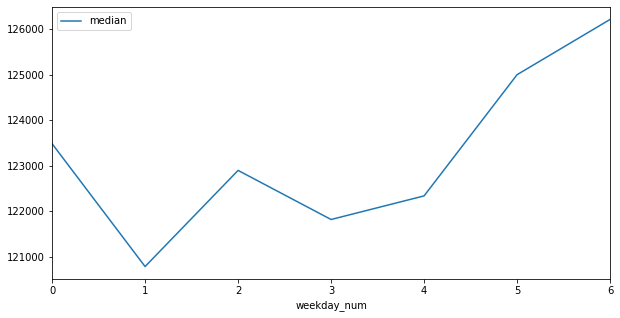

In [51]:
price_weekday_center=saint_pete_center.pivot_table(index='weekday_num', values='square_price',aggfunc=['median','mean', 'count'])
price_weekday_center.columns=['median','mean', 'count']
print(price_weekday_center)
price_weekday_center.plot(y='median', figsize=(10,5))
plt.show()

Наименьшая цена наблюдается во вторник, а наибольшая к субботе. На общем графике вторник и среда были наиболее "дорогими" днями. 

              median           mean  count
month                                     
1      126966.292135  142339.440428    271
2      121475.066196  140812.084413    460
3      129581.797678  142588.194930    472
4      123092.375367  149617.786037    414
5      126061.120543  136000.894648    258
6      116927.685950  140598.526241    340
7      120272.904483  140901.688733    352
8      125000.000000  142036.239198    325
9      122679.425837  139711.216725    388
10     121000.000000  136177.426581    375
11     122077.922078  138268.457599    431
12     120721.526535  144208.725786    296


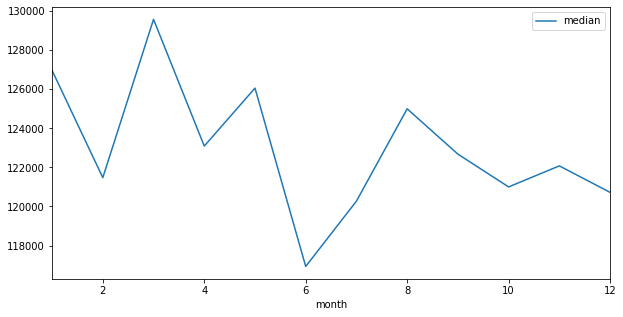

In [52]:
price_month_center=saint_pete_center.pivot_table(index='month', values='square_price',aggfunc=['median','mean', 'count'])
price_month_center.columns=['median','mean', 'count']
print(price_month_center)
price_month_center.plot(y='median', figsize=(10,5))
plt.show()

Данный график примерно повторяет принцип сезонности общего графика

             median           mean  count
year                                     
2014  142766.821583  179615.384197     38
2015  120472.199730  142690.496438    368
2016  119767.441860  141990.502063    591
2017  119470.649895  138938.322719   1552
2018  123529.411765  137496.021954   1347
2019  133662.860577  153713.010703    486


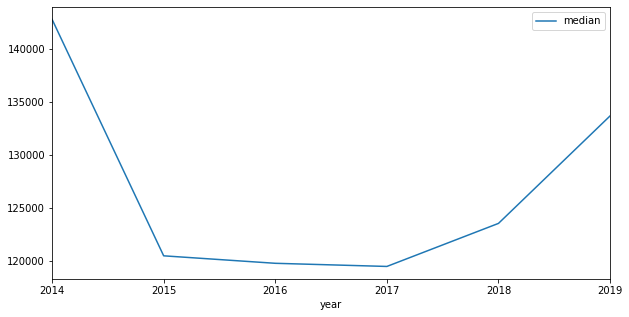

In [53]:
price_year_center=saint_pete_center.pivot_table(index='year', values='square_price',aggfunc=['median','mean', 'count'])
price_year_center.columns=['median','mean', 'count']
print(price_year_center)
price_year_center.plot(y='median', figsize=(10,5))
plt.show()

Для центра Питера картина не изменилась. 

## Общий вывод

- Мы обработали архив данных на предмет пропусков и ошибок, изменили типы данных и оптимизировали его. 
- Мы посчитали и добавили в таблицу цену квадратного метра; день, месяц и год публикации объявления; категорию этажа: первый, другой или последний, а также соотношение жилой площади к общей, а также соотношение плозади кухни к общей площади. 
- Изучили такие параметры, как площадь, цена, количество комнат, и высота потолков. 
- Изучили время продажи квартиры: среднее время продажи составило 167 дней, а медианное 87 дней. Межквартильный размах составил от 20 до 218 дней, однако на общей гистограмме видим, что срок продажи может достигать и 600 дней
- Изучили влияние цены от площади, числа комнат, удалённости от центра. Наибольшее влияние - удаленность от центра. Наименьшее - площадь. Дата размещения объявления о продаже не сильно влияет на стоимость, однако можно увидеть как менялась средняя стоимость квадратного метра жилья за последние 5 лет - в 2015-2017 годах было общее снижение рынка недвижимости. 
- Определили 10 городов с наибольшим количеством объявлений. Наибольшая стоимость квадратного метра в Санкт-Петербурге, а нименьшая в Выборге.
- По графику изменения цен в зависимости от удаленности от центра Питера, мы определили границу центральной зоны - 9 км. 
- Выделили и изучили факторы влияющие на стоимость квартир в центре Санкт-Петербурга. Наибольшая зависимость цены квартиры от числа комнат - коэфициент Пирсона - 0.35. Этаж и удаленность от центра прямого влияния на цену практически не имеют - коэффициенты корреляции - 0.11 и -0.10 соответственно. В среднем же стоимость квартиры в центре Санкт-Петербурга в два раза выше чем в регионе. Зависимость даты публикации объявления в целом повторяет такую же зависимость для всей области, за исключением дней недели - наибольшая стоимость квартиры обычно по субботам. 